In [ ]:
#Business Goal:
#Build a predictive model to identify who would be admitted

In [ ]:
import pandas as pd
raw_df=pd.read_excel('/content/telco.xlsx')

In [ ]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   customerID       7032 non-null   object 
 1   gender           7032 non-null   object 
 2   SeniorCitizen    7032 non-null   int64  
 3   Dependents       7032 non-null   object 
 4   tenure           7032 non-null   int64  
 5   InternetService  7032 non-null   object 
 6   PaymentMethod    7032 non-null   object 
 7   TotalCharges     7032 non-null   float64
 8   Churn            7032 non-null   int64  
dtypes: float64(1), int64(3), object(5)
memory usage: 494.6+ KB


In [ ]:
raw_df.head()

,customerID,gender,SeniorCitizen,Dependents,tenure,InternetService,PaymentMethod,TotalCharges,Churn
0,7590-VHVEG,Female,0,No,1,DSL,Electronic check,29.85,0
1,7795-CFOCW,Male,0,No,45,DSL,Bank transfer (automatic),1840.75,0
2,9237-HQITU,Female,0,No,2,Fiber optic,Electronic check,151.65,1
3,9305-CDSKC,Female,0,No,8,Fiber optic,Electronic check,820.50,1
4,1452-KIOVK,Male,0,Yes,22,Fiber optic,Credit card (automatic),1949.40,0


In [ ]:
raw_df

,customerID,gender,SeniorCitizen,Dependents,tenure,InternetService,PaymentMethod,TotalCharges,Churn
0,7590-VHVEG,Female,0,No,1,DSL,Electronic check,29.85,0
1,7795-CFOCW,Male,0,No,45,DSL,Bank transfer (automatic),1840.75,0
2,9237-HQITU,Female,0,No,2,Fiber optic,Electronic check,151.65,1
3,9305-CDSKC,Female,0,No,8,Fiber optic,Electronic check,820.50,1
4,1452-KIOVK,Male,0,Yes,22,Fiber optic,Credit card (automatic),1949.40,0
...,...,...,...,...,...,...,...,...,...
7027,1471-GIQKQ,Female,0,No,1,DSL,Electronic check,49.95,0
7028,9837-FWLCH,Male,0,Yes,12,No,Electronic check,239.00,0
7029,9281-CEDRU,Female,0,No,68,DSL,Bank transfer (automatic),4326.25,0
7030,8456-QDAVC,Male,0,No,19,Fiber optic,Bank transfer (automatic),1495.10,0


In [ ]:
##------------------------------------------
##  Identify the Class Label or Y variable
##------------------------------------------
Y = raw_df.Churn.astype('category')

print(Y.info())

<class 'pandas.core.series.Series'>
RangeIndex: 7032 entries, 0 to 7031
Series name: Churn
Non-Null Count  Dtype   
--------------  -----   
7032 non-null   category
dtypes: category(1)
memory usage: 7.1 KB
None


In [ ]:
##-------------------------------------------------------------------
##  Select the Predictor Variables into a list called X_features
##--------------------------------------------------------------------
X_features = list( raw_df.columns )
X_features.remove( 'Churn' )
X_features.remove( 'customerID' )

In [ ]:
print(X_features)

['gender', 'SeniorCitizen', 'Dependents', 'tenure', 'InternetService', 'PaymentMethod', 'TotalCharges']


In [ ]:
##------------------------------------------
##  Set up a dataframe with only X-variables
##------------------------------------------
X =  raw_df[X_features]

In [ ]:
##-----------------------------------------
##  Split the Data into Training and Test
##  test size=0.3 indicates 70% training and
##  30% test data
##-----------------------------------------
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,
Y,
test_size = 0.3,
random_state = 500)
print(y_train.info())

##############################################################################
##  All data processing should be done after split to prevent data leakage  ##
##############################################################################

<class 'pandas.core.series.Series'>
Index: 4922 entries, 848 to 7002
Series name: Churn
Non-Null Count  Dtype   
--------------  -----   
4922 non-null   category
dtypes: category(1)
memory usage: 43.4 KB
None


In [ ]:
raw_df.select_dtypes(include='object').columns

Index(['customerID', 'gender', 'Dependents', 'InternetService',
       'PaymentMethod'],
      dtype='object')

In [ ]:
##############################################################################
##  Pre-process X-vars   ##
##############################################################################

##-----------------------------------------------------------------------
##  1. Identify and dummy code (one-hot encoding) the categorical column
##-----------------------------------------------------------------------
# List of categorical columns
categorical_columns = ['gender', 'Dependents', 'InternetService','PaymentMethod']
X_train_encoded = pd.get_dummies(X_train, columns=categorical_columns,drop_first = True,dtype=int )
X_test_encoded = pd.get_dummies(X_test, columns=categorical_columns,drop_first = True ,dtype=int)



In [ ]:
X_train_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4922 entries, 848 to 7002
Data columns (total 10 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   SeniorCitizen                          4922 non-null   int64  
 1   tenure                                 4922 non-null   int64  
 2   TotalCharges                           4922 non-null   float64
 3   gender_Male                            4922 non-null   int64  
 4   Dependents_Yes                         4922 non-null   int64  
 5   InternetService_Fiber optic            4922 non-null   int64  
 6   InternetService_No                     4922 non-null   int64  
 7   PaymentMethod_Credit card (automatic)  4922 non-null   int64  
 8   PaymentMethod_Electronic check         4922 non-null   int64  
 9   PaymentMethod_Mailed check             4922 non-null   int64  
dtypes: float64(1), int64(9)
memory usage: 423.0 KB


In [ ]:
X_train_encoded.head()

,SeniorCitizen,tenure,TotalCharges,gender_Male,Dependents_Yes,InternetService_Fiber optic,InternetService_No,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
848,0,40,3208.65,0,0,0,0,0,0,1
3894,1,57,4140.10,1,0,0,0,1,0,0
1038,1,72,8317.95,0,0,1,0,0,0,0
5816,0,1,49.50,0,0,0,0,0,1,0
4515,0,4,117.80,1,0,0,1,0,0,1


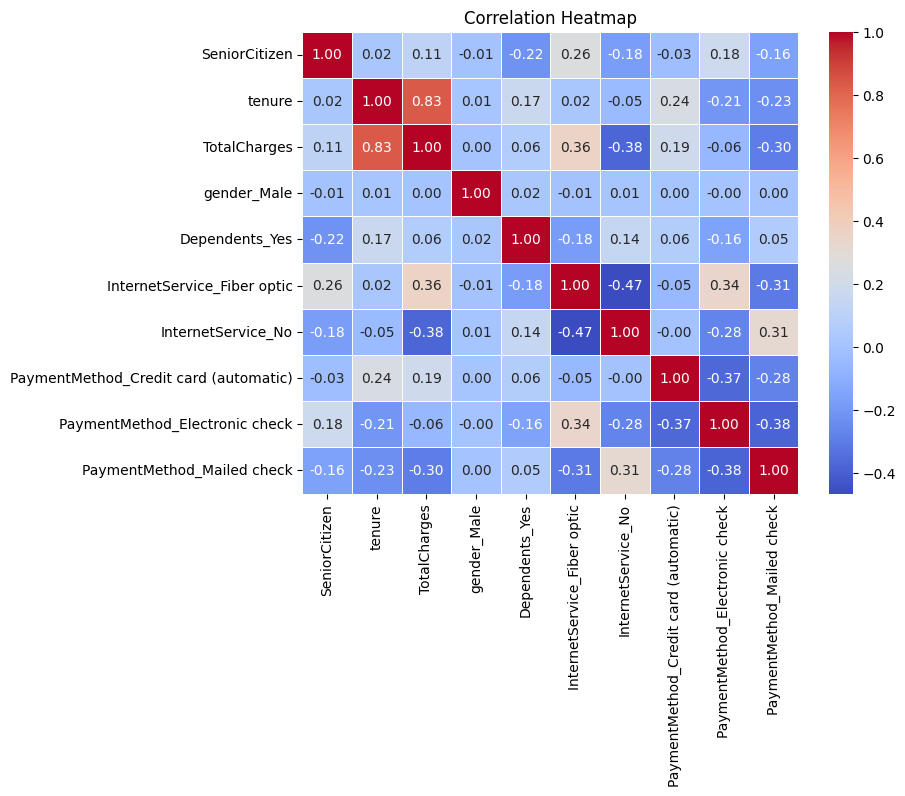

In [ ]:
##-----------------------------------------------------------------------
##  2. Identify and and remove highly correlated columns
##-----------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns
corr_matrix = X_train_encoded.corr(numeric_only=True)
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt = '.2f')
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
corr_matrix

,SeniorCitizen,tenure,TotalCharges,gender_Male,Dependents_Yes,InternetService_Fiber optic,InternetService_No,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
SeniorCitizen,1.000000,0.024593,0.109680,-0.007682,-0.216606,0.256590,-0.176431,-0.029694,0.181090,-0.159787
tenure,0.024593,1.000000,0.830420,0.010858,0.168231,0.018105,-0.047493,0.235339,-0.208171,-0.233245
TotalCharges,0.109680,0.830420,1.000000,0.001944,0.058271,0.357181,-0.376621,0.187317,-0.058848,-0.298149
gender_Male,-0.007682,0.010858,0.001944,1.000000,0.023191,-0.008203,0.008070,0.004009,-0.002606,0.002888
Dependents_Yes,-0.216606,0.168231,0.058271,0.023191,1.000000,-0.184299,0.141886,0.062024,-0.156584,0.049841
InternetService_Fiber optic,0.256590,0.018105,0.357181,-0.008203,-0.184299,1.000000,-0.466671,-0.049493,0.337529,-0.307283
InternetService_No,-0.176431,-0.047493,-0.376621,0.008070,0.141886,-0.466671,1.000000,-0.004801,-0.276772,0.314503
PaymentMethod_Credit card (automatic),-0.029694,0.235339,0.187317,0.004009,0.062024,-0.049493,-0.004801,1.000000,-0.373840,-0.283044
PaymentMethod_Electronic check,0.181090,-0.208171,-0.058848,-0.002606,-0.156584,0.337529,-0.276772,-0.373840,1.000000,-0.384594
PaymentMethod_Mailed check,-0.159787,-0.233245,-0.298149,0.002888,0.049841,-0.307283,0.314503,-0.283044,-0.384594,1.000000


In [ ]:
X_train_encoded = X_train_encoded.drop('TotalCharges', axis = 1)

In [ ]:
##-------------------------
##  Build the logit model
##-------------------------
import statsmodels.api as sm
##  Constant is to be added when using the sm library
X_train_encoded = sm.add_constant( X_train_encoded )
#Call Logistic regression with X and Y variables of the training data
# Model is built with the training data
logit = sm.Logit(y_train, X_train_encoded)
##  Fit the model and display results
logit_model = logit.fit()
print(logit_model.summary2())

Optimization terminated successfully.
         Current function value: 0.434223
         Iterations 7
                                    Results: Logit
Model:                      Logit                  Method:                 MLE        
Dependent Variable:         Churn                  Pseudo R-squared:       0.249      
Date:                       2024-09-25 05:47       AIC:                    4294.4947  
No. Observations:           4922                   BIC:                    4359.5094  
Df Model:                   9                      Log-Likelihood:         -2137.2    
Df Residuals:               4912                   LL-Null:                -2846.7    
Converged:                  1.0000                 LLR p-value:            6.4080e-300
No. Iterations:             7.0000                 Scale:                  1.0000     
--------------------------------------------------------------------------------------
                                       Coef.  Std.Err.    z     

In [ ]:
#Only significant X-vars are used to build the predictive model
#Only significant X-vars are used to build the predictive model
#Select the significant variables

significant_vars = logit_model.pvalues[logit_model.pvalues < 0.05].index.tolist()
# Remove the constant if it's present
if 'const' in significant_vars:
  significant_vars.remove('const')
print(significant_vars)


['SeniorCitizen', 'tenure', 'Dependents_Yes', 'InternetService_Fiber optic', 'InternetService_No', 'PaymentMethod_Electronic check']


In [ ]:
##-------------------------------------------------------
##  Revise model to include only significant predictors
##-------------------------------------------------------
#final_logit holds the logistic regression equation aka -the model
#Only significant X-vars are used to build the predictive model
final_logit_model = sm.Logit( y_train,X_train_encoded[significant_vars] ).fit()
print(final_logit_model.summary2())

Optimization terminated successfully.
         Current function value: 0.438080
         Iterations 7
                                Results: Logit
Model:                   Logit                Method:               MLE        
Dependent Variable:      Churn                Pseudo R-squared:     0.243      
Date:                    2024-09-25 05:51     AIC:                  4324.4643  
No. Observations:        4922                 BIC:                  4363.4731  
Df Model:                5                    Log-Likelihood:       -2156.2    
Df Residuals:            4916                 LL-Null:              -2846.7    
Converged:               1.0000               LLR p-value:          1.8750e-296
No. Iterations:          7.0000               Scale:                1.0000     
-------------------------------------------------------------------------------
                                Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
---------------------------------------------------

In [ ]:
##----------------------------
##  Apply model on test data
##----------------------------
X_test_encoded=sm.add_constant(X_test_encoded)
#Make sure only the significant variables in the test data are selected
X_test_sig_vars=X_test_encoded[significant_vars]
X_test_sig_vars
y_prob=final_logit_model.predict(X_test_sig_vars)
#y_prob holds the probability values for each record in the test data

In [ ]:
y_prob

,0
1173,0.308154
3591,0.026497
1074,0.327547
6718,0.165581
1030,0.098599
...,...
2812,0.657673
5291,0.015325
3024,0.303005
6026,0.377574


In [ ]:
#Create a dataframe to store the test data's Y value and the predicted probability value
#The original admit column is stored as "actual_Y"
#The predicted prob is stored in y_prob
y_pred_df = pd.DataFrame( { "actual_Y": y_test,
"predicted_prob":y_prob})


In [ ]:
print(y_pred_df.head())

     actual_Y  predicted_prob
1173        0        0.308154
3591        1        0.026497
1074        0        0.327547
6718        1        0.165581
1030        0        0.098599


In [ ]:
##---------------------------------
##  Based on default cut-off -0.5
##---------------------------------
y_pred_df['predicted_Y'] = y_pred_df.predicted_prob.map(
lambda x: 1 if x >= 0.5 else 0)
print(y_pred_df.head())

     actual_Y  predicted_prob  predicted_Y
1173        0        0.308154            0
3591        1        0.026497            0
1074        0        0.327547            0
6718        1        0.165581            0
1030        0        0.098599            0


In [ ]:
from sklearn.metrics import confusion_matrix
# Generating the confusion matrix using the DataFrame columns
cm = confusion_matrix(y_pred_df['actual_Y'],y_pred_df['predicted_Y'])
print(cm)

[[1389  157]
 [ 273  291]]


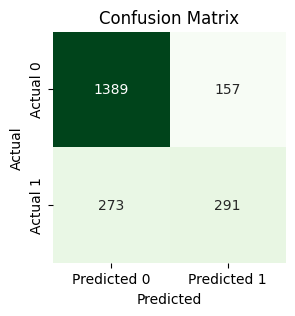

In [ ]:
# Create a heatmap for the confusion matrix
plt.figure(figsize=(3,3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [ ]:
# Calculate Sensitivity (Recall), Specificity, and Accuracy using scikit-learn functions
from sklearn.metrics import  accuracy_score, recall_score, precision_score
sensitivity = recall_score(y_pred_df['actual_Y'], y_pred_df['predicted_Y'])
accuracy = accuracy_score(y_pred_df['actual_Y'], y_pred_df['predicted_Y'])

# Print metrics
print(f"Sensitivity (Recall): {sensitivity:.2f}")
print(f"Accuracy: {accuracy:.2f}")

Sensitivity (Recall): 0.52
Accuracy: 0.80


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
print("\nClassification Report:")
print(classification_report(y_pred_df['actual_Y'],y_pred_df['predicted_Y']))


Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1546
           1       0.65      0.52      0.58       564

    accuracy                           0.80      2110
   macro avg       0.74      0.71      0.72      2110
weighted avg       0.79      0.80      0.79      2110



In [ ]:
#Implications/ Recommendations

In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix

def compute_sensitivity_table(y_actual, y_prob, specific_thresholds=np.arange(0.1, 0.5, 0.01)):
    """
    This function computes and prints a table of sensitivity (TPR) values for specified thresholds (0.1 to 0.5).

    Parameters:
    y_actual: array-like
        The actual binary labels.
    y_prob: array-like
        The predicted probabilities for the positive class.
    specific_thresholds: array-like, optional
        The specific thresholds for which to compute sensitivity. Default is np.arange(0.1, 0.5, 0.01).
    """

    results = []  # List to store results for the table

    for threshold in specific_thresholds:
        # Convert predicted probabilities to binary predictions based on the threshold
        y_pred = (y_prob >= threshold).astype(int)

        # Get the confusion matrix
        tn, fp, fn, tp = confusion_matrix(y_actual, y_pred).ravel()

        # Calculate TPR (Sensitivity)
        tpr = tp / (tp + fn) if (tp + fn) > 0 else 0  # Avoid division by zero

        # Append results
        results.append({'Threshold': threshold, 'Sensitivity (TPR)': tpr})

    # Create a DataFrame for better formatting
    sensitivity_table = pd.DataFrame(results)

    # Print the sensitivity table
    print(sensitivity_table)

In [ ]:
compute_sensitivity_table(y_pred_df['actual_Y'], y_pred_df['predicted_prob'])

    Threshold  Sensitivity (TPR)
0        0.10           0.946809
1        0.11           0.930851
2        0.12           0.914894
3        0.13           0.900709
4        0.14           0.895390
5        0.15           0.886525
6        0.16           0.879433
7        0.17           0.861702
8        0.18           0.831560
9        0.19           0.826241
10       0.20           0.819149
11       0.21           0.810284
12       0.22           0.806738
13       0.23           0.801418
14       0.24           0.790780
15       0.25           0.783688
16       0.26           0.773050
17       0.27           0.767730
18       0.28           0.764184
19       0.29           0.757092
20       0.30           0.746454
21       0.31           0.739362
22       0.32           0.734043
23       0.33           0.721631
24       0.34           0.716312
25       0.35           0.710993
26       0.36           0.702128
27       0.37           0.696809
28       0.38           0.687943
29       0

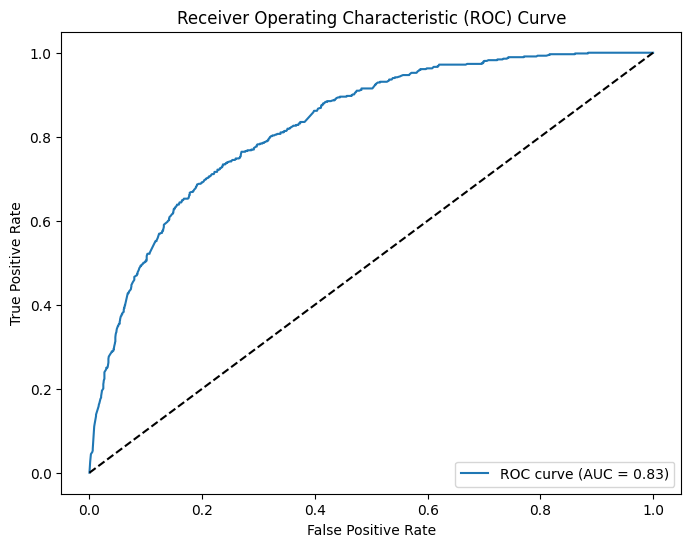

In [ ]:
# prompt: print the roc curve for this

from sklearn.metrics import roc_curve, roc_auc_score

# Calculate the false positive rate (fpr), true positive rate (tpr), and thresholds
fpr, tpr, thresholds = roc_curve(y_pred_df['actual_Y'], y_pred_df['predicted_prob'])

# Calculate the area under the ROC curve (AUC)
auc = roc_auc_score(y_pred_df['actual_Y'], y_pred_df['predicted_prob'])

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line representing random guessing
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


In [ ]:
# prompt: Make a decisojn about the model

# Based on the evaluation metrics and ROC curve analysis, we can make a decision about the model.

# Observations:
# 1. Accuracy is relatively high (around 80%).
# 2. Sensitivity (Recall) is relatively low (around 50%), indicating that the model might miss a significant portion of the actual churners.
# 3. AUC is moderate (around 0.8).
# 4. The ROC curve suggests that the model is better than random guessing but has room for improvement.

# Decision:

# The current model has a decent accuracy, but it may not be optimal for identifying all churners.
# Depending on the business priorities, we might need to adjust the model.

# Possible actions:

# 1. If minimizing the number of missed churners (false negatives) is the priority, we can adjust the threshold for classifying customers as churned to a lower value. This might lead to a decrease in precision but will likely improve recall.
# 2. Analyze the features that contribute most to churn prediction and investigate if more relevant features can be added or if existing features can be engineered to improve model performance.
# 3. Consider using other machine learning algorithms, like Support Vector Machines (SVM) or Random Forests, to see if they offer better performance.
# 4. Look into techniques to handle class imbalance, such as oversampling the minority class or using weighted loss functions, if churn is a relatively rare event.

# Recommendation:

# It's recommended to prioritize improving the model's sensitivity (recall) to ensure that a greater percentage of churners are correctly identified.
# Further analysis and potentially adjusting the threshold, feature engineering, or exploring alternative algorithms can be implemented to refine the model and meet the business objective of proactively identifying potential churners.


## Churn =1 -> Positive Class -> Class of our Interest
- Right now Sensitivity is very low
- That why the Model is not good at making the current Business
 Decision on Predicting Churn
- Model not recommend at 0.5 Cutoff
- Sensiitivity at 90% at 0.13 threshold, so it can be the recommended cutoff to build the model

AUC: 0.83
